In [2]:
import pandas as pd
import io
import requests
from colorspacious import cspace_converter
from collections import OrderedDict
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pandas_profiling


cmaps = OrderedDict()
%matplotlib inline

In [3]:
from numpy.random import randn
import pandas as np
import numpy as np

In [4]:
df_2 = pd.read_csv('data.csv',thousands=',')
venture_capital_15= pd.read_csv('venture_capital_2015.csv')
industry_growth=pd.read_csv('industry_growth_2018.csv')

Get rid of punctuations,drop unwanted columns,change column names to lowercase

Categorize Data,Dummy sharks investments

In [5]:
df_2.columns = df_2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [6]:
df_2['equity'] = df_2["equity"].str.strip("%")

In [7]:
df_2.columns

Index(['row', 'season', 'no._in_series', 'company', 'deal', 'industry',
       'entrepreneur_gender', 'amount', 'equity', 'valuation', 'corcoran',
       'cuban', 'greiner', 'herjavec', 'john', 'o'leary', 'harrington',
       'guest', '#_sharks', '$_per_shark', 'details_/_notes'],
      dtype='object')

In [8]:
cols_to_drop =['row','no._in_series','#_sharks','$_per_shark', 'details_/_notes','company']
df_2 = df_2.drop(cols_to_drop,axis=1)

In [9]:
df_2['amount'] = df_2['amount'].str.replace(',', '')
df_2['amount'] = df_2['amount'].str.replace('$', '')
df_2['valuation'] = df_2['valuation'].str.replace(',', '')
df_2['valuation'] = df_2['valuation'].str.replace('$', '')

In [10]:
df_2['industry']= df_2['industry'].str.replace('/', '').str.replace(' ', '')

In [11]:
df_2.columns = df_2.columns.str.replace(r"[\"\',]", '')

In [12]:
df_2=df_2.drop(df.index[[0]])

In [13]:
df_2=df_2.fillna(value=0)

In [14]:
df_2.dtypes

season                 float64
deal                    object
industry                object
entrepreneur_gender     object
amount                  object
equity                  object
valuation               object
corcoran               float64
cuban                  float64
greiner                float64
herjavec               float64
john                   float64
oleary                 float64
harrington             float64
guest                  float64
dtype: object

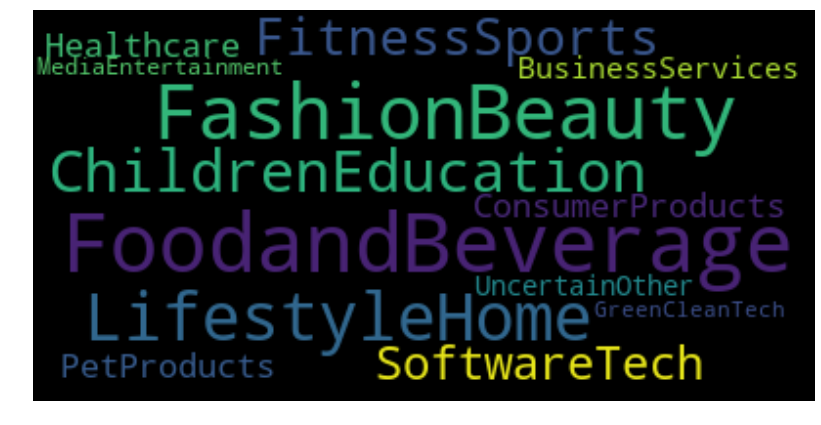

In [15]:
from PIL import Image
from wordcloud import WordCloud
%matplotlib inline





wordcloud2 = WordCloud().generate(' '.join(df_2['industry']))
plt.figure(figsize = (14,8))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# Investments by Gender 

In [16]:
wins_df = df_2[df_2['deal']!= 'No' ]

In [17]:
GENDER=pd.DataFrame(df_2.groupby('entrepreneur_gender')['deal'].count().sort_values(ascending=False))

In [18]:
GENDER_WINS=pd.DataFrame(wins_df.groupby('entrepreneur_gender')['deal'].count().sort_values(ascending=False))

In [19]:
GENDER_DF=pd.merge(GENDER,GENDER_WINS,on='entrepreneur_gender')

In [20]:
GENDER_DF.columns=['contestants','funded']

In [21]:
GENDER_DF

,contestants,funded
entrepreneur_gender,,
Male,295,142
Female,125,67
Mixed Team,75,40


Text(0, 0.5, 'count')

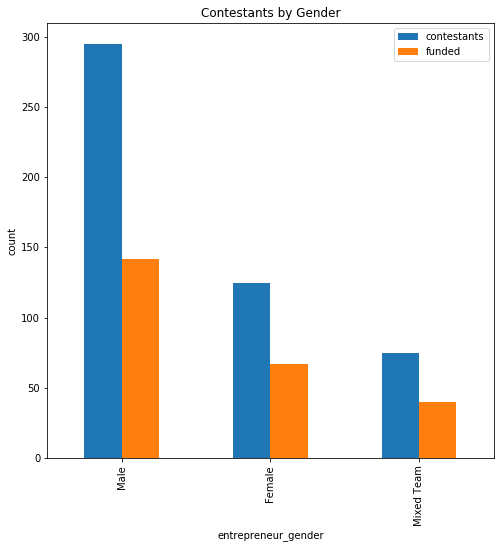

In [22]:
GENDER_DF.plot(kind='bar',figsize=(8,8))
plt.title('Contestants by Gender')
plt.ylabel('count')

# Pitches that got funded

In [23]:
season_deals = wins_df.groupby(['season'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

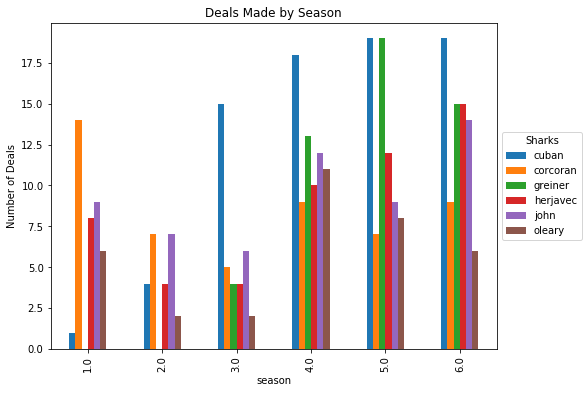

In [24]:
season_deals.plot(kind='bar',figsize=(8,6))
plt.ylabel('Number of Deals')
plt.title('Deals Made by Season')
plt.legend(season_deals, title="Sharks", loc="center left", bbox_to_anchor=(1, 0, 1, 1));

In [25]:
season_1=wins_df.loc[wins_df['season'] == 1]

In [26]:
season_1=season_1.groupby(['industry'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

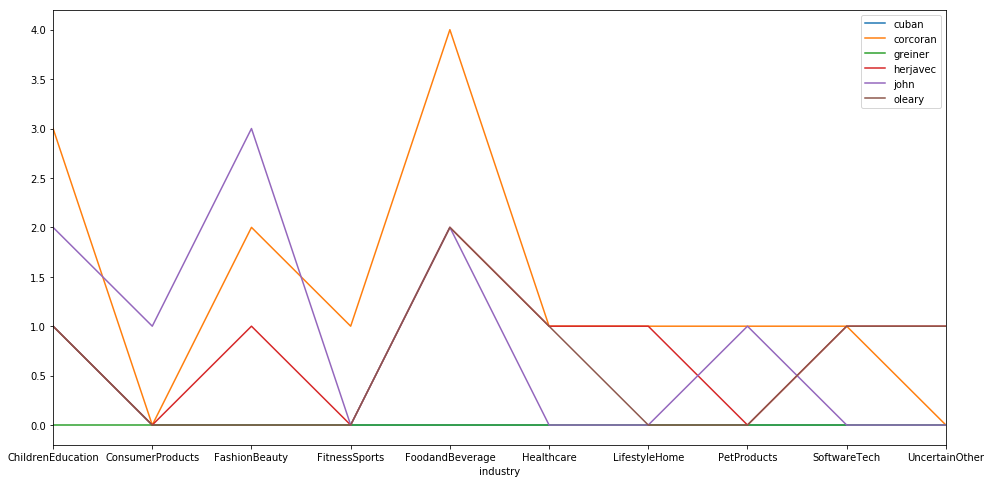

In [27]:
season_1.plot(figsize=(16,8))

In [28]:
season_6=wins_df.loc[wins_df['season'] == 6]

In [29]:
season_6=season_6.groupby(['industry'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

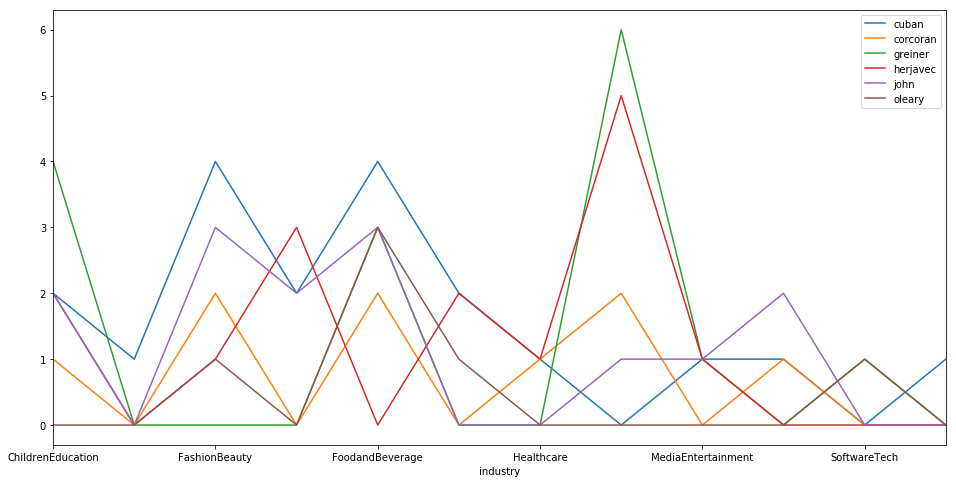

In [30]:
season_6.plot(figsize=(16,8))

In [31]:
equity_deals = wins_df.groupby(['equity'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

# Sharks investment percenatges by Gender

In [32]:
gender=wins_df.groupby('entrepreneur_gender')['corcoran', 'cuban', 'greiner',
       'herjavec', 'john', 'oleary', 'harrington'].sum()

In [33]:
gender

,corcoran,cuban,greiner,herjavec,john,oleary,harrington
entrepreneur_gender,,,,,,,
Female,24.0,20.0,15.0,7.0,15.0,7.0,3.0
Male,19.0,43.0,27.0,39.0,34.0,22.0,5.0
Mixed Team,8.0,13.0,9.0,7.0,8.0,6.0,0.0


In [34]:
gender = gender.T

In [35]:
gender['Total']=gender['Female']+gender['Male']+gender['Mixed Team']

In [36]:
gender

entrepreneur_gender,Female,Male,Mixed Team,Total
corcoran,24.0,19.0,8.0,51.0
cuban,20.0,43.0,13.0,76.0
greiner,15.0,27.0,9.0,51.0
herjavec,7.0,39.0,7.0,53.0
john,15.0,34.0,8.0,57.0
oleary,7.0,22.0,6.0,35.0
harrington,3.0,5.0,0.0,8.0


In [37]:
gender['female_perc']= gender['Female']/gender['Total']*100
gender['male_perc']= gender['Male']/gender['Total']*100
gender['mixed_team_perc']= gender['Mixed Team']/gender['Total']*100

In [38]:
columns_to_drop=['Female', 'Male', 'Mixed Team','Total','mixed_team_perc']
gender= gender.drop(columns_to_drop,axis=1)

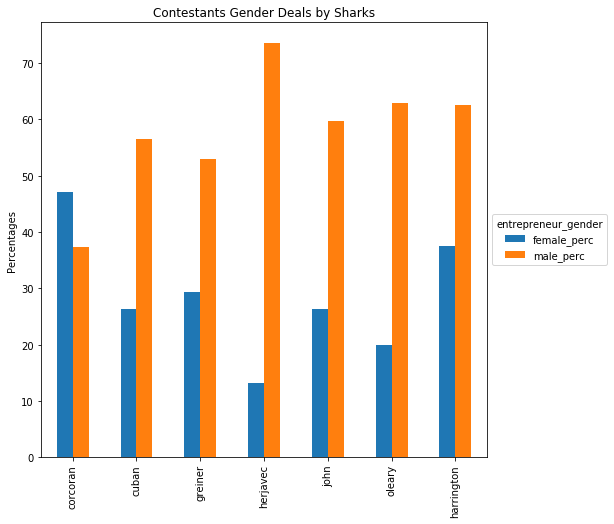

In [39]:
gender.plot(kind='bar',figsize=(8,8))
plt.legend(gender, title="entrepreneur_gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.ylabel('Percentages')
plt.title('Contestants Gender Deals by Sharks');

# Categorizing pitches made by industry

Text(0.5, 0, 'Count')

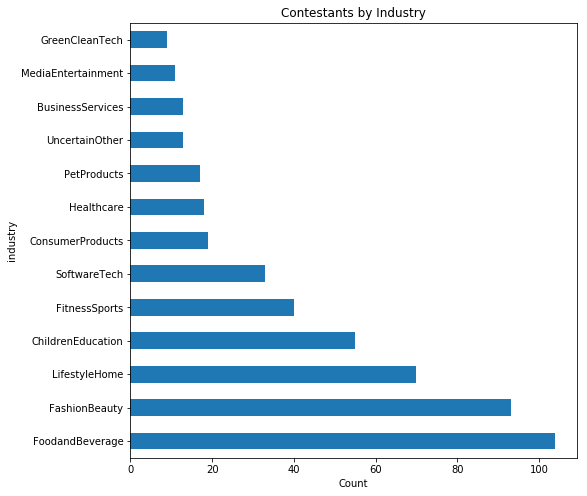

In [40]:
df_2.groupby('industry')['deal'].count().sort_values(ascending=False).plot(kind='barh',figsize=(8,8))
plt.title('Contestants by Industry')
plt.xlabel('Count')

# Ranking Pitches that got funded by industry 

Text(0.5, 0, 'Count')

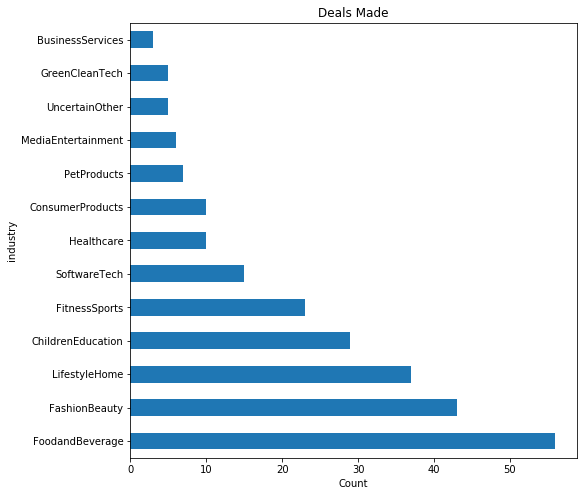

In [41]:
wins_df.groupby('industry')['deal'].count().sort_values(ascending=False).plot(kind='barh',figsize=(8,8))
plt.title('Deals Made')
plt.xlabel('Count')

# Venture Capital Investments 2015

In [42]:
venture_columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
venture_capital_15=venture_capital_15.drop(venture_columns,axis=1)

In [43]:
df_2.industry.value_counts()

FoodandBeverage       104
FashionBeauty          93
LifestyleHome          70
ChildrenEducation      55
FitnessSports          40
SoftwareTech           33
ConsumerProducts       19
Healthcare             18
PetProducts            17
BusinessServices       13
UncertainOther         13
MediaEntertainment     11
GreenCleanTech          9
Name: industry, dtype: int64

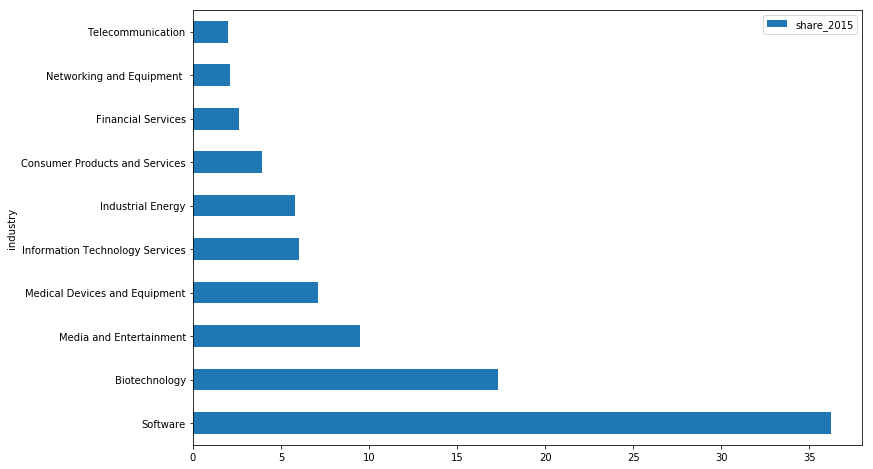

In [44]:
venture_capital_15.plot(kind='barh',x='industry',figsize=(12,8))

# Industry Statistics & Market Size 2018

Text(0.5, 1.0, '2018 Industry Statistics')

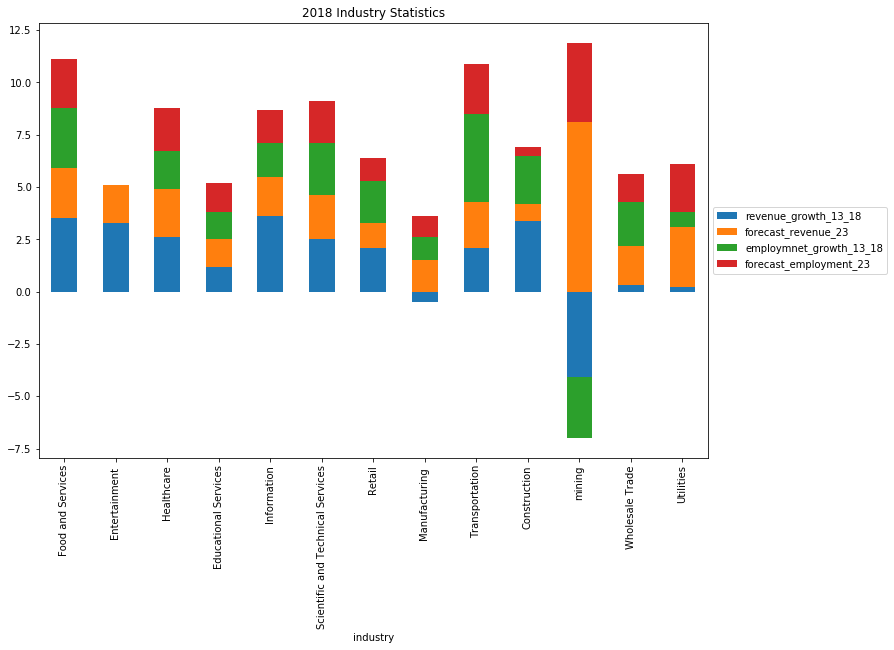

In [45]:
industry_growth.plot(kind='bar',x='industry',stacked=True,figsize=(12,8))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('2018 Industry Statistics')  

In [46]:
col = ['valuation','amount','equity','cuban','corcoran','greiner','herjavec','john','oleary','harrington','guest']


In [47]:
investor_cols =['amount','cuban','corcoran','greiner','herjavec','john','oleary','harrington','guest']

In [48]:
for cols in col:
    df_2[cols]= pd.to_numeric(df_2[cols])

In [49]:
for cols in col:
    wins_df[cols]= pd.to_numeric(wins_df[cols])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [50]:
#big_money_deals['amount']=big_money_deals['amount'].map('{:,.2f}'.format)

In [51]:
#big_money_deals=big_money_deals.loc[:, (big_money_deals != 0).any(axis=0)]

# Sharks investments by industry

In [114]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# sns.set(rc={'figure.figsize':(12,10)}, font_scale=1)
# plt.figure(figsize = (12,10))

# sns.heatmap(corrs,cmap='coolwarm', annot=True)
# # Decorations
# plt.title('Investors & Industries', fontsize=22)
# plt.xlabel('Sharks')
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()

In [122]:
investor_wins=wins_df.groupby(['industry'])[['cuban','corcoran','greiner','herjavec','john','oleary']]

In [121]:
#industry_corr = industry_corr.drop(['season', 'amount', 'equity', 'valuation','guest'], axis=1)

# Industry Vs Investor Buy Ins

In [108]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# sns.set(rc={'figure.figsize':(12,10)}, font_scale=1)
# plt.figure(figsize = (12,10))

# sns.heatmap(investor_wins_corr,cmap='coolwarm', annot=True)
# # Decorations
# plt.title('Investors & Industries', fontsize=22)
# plt.xlabel('Sharks')
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()

# Asking Amount and Equity

In [66]:
amount_equity_df=pd.DataFrame(wins_df[['amount','equity']])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


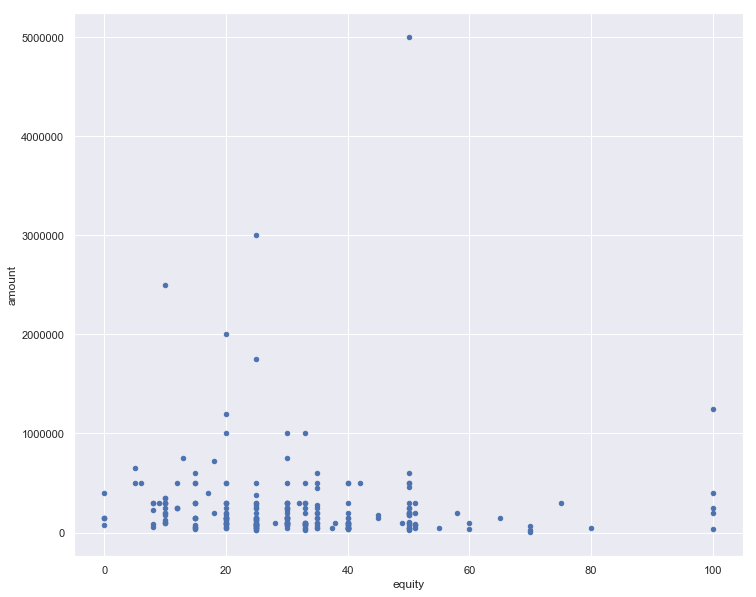

In [67]:
amount_equity_df.plot(kind='scatter',x='equity',y='amount')

# Equity and Valuation 

In [431]:
wins_df['deal'].value_counts()

Yes    249
Name: deal, dtype: int64

# Largest investmnets made by sharks 

In [477]:
money_deals =pd.DataFrame(wins_df.groupby(['amount'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum())

In [448]:
money_deals=money_deals.reset_index()

In [449]:
big_money_deals=money_deals.loc[money_deals['amount'] > 500000]

In [450]:
big_money_deals['amount']=big_money_deals['amount'].map('{:,.2f}'.format)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [451]:
#big_money_deals=big_money_deals.loc[:, (big_money_deals != 0).any(axis=0)]

Text(0.5, 0, 'Money')

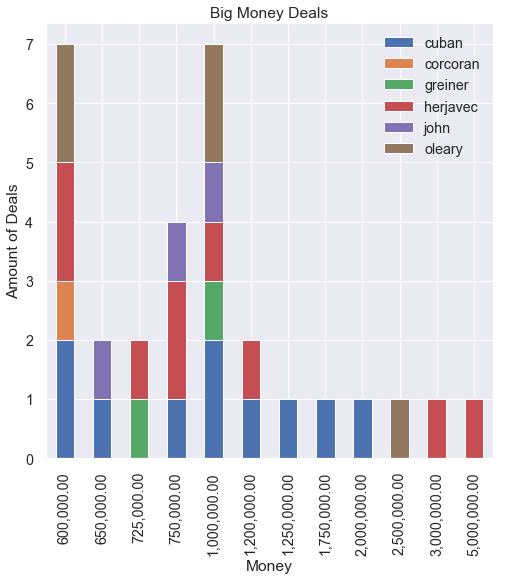

In [465]:
big_money_deals.plot(x='amount',kind='bar',stacked=True,figsize=(8,8))
plt.title('Big Money Deals')
plt.ylabel('Amount of Deals')
plt.xlabel('Money')

# Equity and Valuation For Largest Investments

In [453]:
gm_df=pd.DataFrame(wins_df.groupby(['amount'])[['equity','valuation','cuban','corcoran','greiner','herjavec','john','oleary']].sum())

In [454]:
gm_df=gm_df.reset_index()

In [455]:
gm_df.loc[gm_df['amount'] >= 1200000]

,amount,equity,valuation,cuban,corcoran,greiner,herjavec,john,oleary
38,1200000,20.0,6000000,1.0,0.0,0.0,1.0,0.0,0.0
39,1250000,100.0,1250000,1.0,0.0,0.0,0.0,0.0,0.0
40,1750000,25.0,7000000,1.0,0.0,0.0,0.0,0.0,0.0
41,2000000,20.0,10000000,1.0,0.0,0.0,0.0,0.0,0.0
42,2500000,10.0,25000000,0.0,0.0,0.0,0.0,0.0,1.0
43,3000000,25.0,12000000,0.0,0.0,0.0,1.0,0.0,0.0
44,5000000,50.0,10000000,0.0,0.0,0.0,1.0,0.0,0.0


# Capital Amount buyins by Investor

In [79]:
#investment_amount= wins_df.groupby(['amount'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

In [76]:
investment_amount=wins_df[['amount','corcoran', 'cuban', 'greiner', 'herjavec', 'john','oleary', 'harrington']]

In [77]:
investment_amount_corr=investment_amount.groupby('amount').corr()

In [70]:
investment_amount_corr=investment_amount_corr.fillna(value=0)

In [75]:
# sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.0)
# plt.figure(figsize = (12,10))
# sns.heatmap(investment_amount_corr,xticklabels=investment_amount_corr.columns,cmap='coolwarm', annot=True)
# # Decorations
# plt.title('Capital', fontsize=22)
# plt.xlabel('Sharks')
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()
# plt.show()

# Data

The data was collected from Shark Analytics, who was able to aggregate the information into one relative area.